# 7.2 Model Evaluation - Cross Validation
## Logistic Regression - Diabetes Prediction
Boise State University\
Department of Computer Science\
CS 334 Algorithms of Machine Learning\
Conrad Kennington\
Fall 2020

In [35]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold

In [36]:
# load dataset
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
patients = pd.read_csv("diabetes.csv", header=None, names=col_names, skiprows=[0])

In [37]:
patients.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


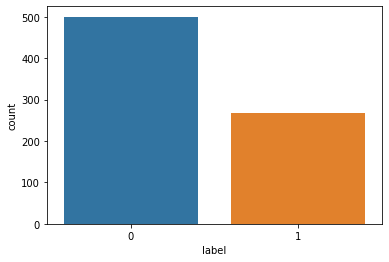

In [38]:
import seaborn as sns
ax = sns.countplot(x="label", data=patients) # Without vs with Diabetes

In [39]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
x1 = patients[feature_cols] # Features
y1 = patients.label # Target variable

# Holdout Validation 

In [30]:
# Evaluate using a train and a test set
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x1, y1, test_size=0.30, random_state=100)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 75.32%


# K-fold Cross-Validation

In [33]:
kfold = model_selection.KFold(n_splits=10)
model_kfold = LogisticRegression(max_iter=1000)
results_kfold = model_selection.cross_val_score(model_kfold, x1, y1, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 78.12%


# Stratified K-fold Validation

In [43]:
skfold = StratifiedKFold(n_splits=3)
model_skfold = LogisticRegression(max_iter=1000)
results_skfold = model_selection.cross_val_score(model_skfold, x1, y1, cv=skfold)
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

Accuracy: 77.08%


# Leave One Out Cross-Validation

In [46]:
loocv = model_selection.LeaveOneOut()
model_loocv = LogisticRegression(max_iter=1000)
results_loocv = model_selection.cross_val_score(model_loocv, x1, y1, cv=loocv)
print("Accuracy: %.2f%%" % (results_loocv.mean()*100.0))

Accuracy: 77.86%


# Repeated Random Test-Train Splits

In [48]:
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=100)
model_shufflecv = LogisticRegression(max_iter=1000)
results_4 = model_selection.cross_val_score(model_shufflecv, x1, y1, cv=kfold2)
print("Accuracy: %.2f%% (%.2f%%)" % (results_4.mean()*100.0, results_4.std()*100.0))

Accuracy: 75.89% (3.07%)
